<a href="https://colab.research.google.com/github/marisolm3236/Hotel_Booking_Analysis/blob/main/Hotel_Bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Bookings

The goals for this notebook are to explore and analyze what causes a hotel booking to cancel. Once we are able to determine this, we then will use the important features to make a few models. Finally, we will ensemble these models to get the best working model.

### Importing and Loading the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/Project3_HotelBookings/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(drive_dir + 'Data/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Describing the data


The goal of this section is simply to explore each of the columns and look at what each of them contain.

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

`is_canceled1`:Value indicating if the booking was canceled (1) or not (0)

In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

`lead_time`: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

In [ ]:
df['lead_time'].value_counts()[:10]

0     6345
1     3460
2     2069
3     1816
4     1715
5     1565
6     1445
7     1331
8     1138
12    1079
Name: lead_time, dtype: int64

In [ ]:
df['lead_time'].nunique()

479

In [ ]:
df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [ ]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
df['arrival_date_week_number'].value_counts()

33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_number, dtype: int64

In [ ]:
df['arrival_date_day_of_month'].value_counts()

17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64

`stays_in_weekend_nights`:Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

In [ ]:
df['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

`stays_in_week_nights`:Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel 

In [ ]:
df['stays_in_week_nights'].value_counts()

2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
42        1
26        1
32        1
33        1
34        1
35        1
41        1
50        1
Name: stays_in_week_nights, dtype: int64

Number of adults	

In [ ]:
df['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

In [ ]:
df['adults'].sum()

221636

Number of babies

In [ ]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df['children'].sum()

12403.0

In [ ]:
df['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

Type of meal booked. Categories are presented in standard hospitality meal packages:	BO, BL and ML
Undefined/SC – no meal package;
- BB – Bed & Breakfast;
- HB – Half board (breakfast and one other meal – usually dinner);
- FB – Full board (breakfast, lunch and dinner)
- Undefined/SC - no meal

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
mealdict = {'Undefined':'SC', 'BB': 'BB', 'HB': 'HB', 'FB': 'FB', 'SC': 'SC'} 
df['meal'] = df['meal'].map(mealdict) 

In [ ]:
df['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

In [ ]:
df['country'].value_counts()[:10]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

In [ ]:
df['country'].nunique()

177

Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [ ]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [ ]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

Value indicating if the booking name was from a repeated guest (1) or not (0)

In [ ]:
df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

Number of previous bookings that were cancelled by the customer prior to the current booking

In [ ]:
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [ ]:
df['previous_bookings_not_canceled'].value_counts()[:10]

0    115770
1      1542
2       580
3       333
4       229
5       181
6       115
7        88
8        70
9        60
Name: previous_bookings_not_canceled, dtype: int64

In [ ]:
df['previous_bookings_not_canceled'].nunique()

73

Code of room type reserved. Code is presented instead of designation for anonymity reasons

In [ ]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

In [ ]:
df['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

In [ ]:
df['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
11         2
12         2
16         2
17         2
20         1
18         1
21         1
Name: booking_changes, dtype: int64

Indication on if the customer made a deposit to guarantee the booking. 

In case no payments were found the value is “No Deposit”.
- No Deposit – no deposit was made

If the payment was equal or exceeded the total cost of stay, the value is set as “Non Refund”.
- Non Refund – a deposit was made in the value of the total stay cost

Otherwise the value is set as “Refundable”
- Refundable – a deposit was made with a value under the total cost of stay.

In [ ]:
df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

ID of the travel agency that made the booking


In [ ]:
df['agent'].value_counts()[:10]

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
6.0       3290
250.0     2870
241.0     1721
28.0      1666
8.0       1514
3.0       1336
37.0      1230
19.0      1061
40.0      1039
314.0      927
21.0       875
229.0      786
242.0      780
83.0       696
29.0       683
171.0      607
12.0       578
85.0       554
20.0       540
96.0       537
243.0      514
30.0       484
134.0      482
298.0      472
27.0       450
15.0       402
26.0       401
11.0       395
22.0       382
56.0       375
273.0      349
177.0      347
86.0       338
58.0       335
5.0        330
119.0      304
196.0      301
34.0       294
44.0       292
138.0      287
315.0      284
38.0       274
10.0       260
Name: agent, dtype: int64

In [ ]:
df['agent'].nunique()

333

	ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

In [ ]:
df['company'].value_counts()[:10]

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
412.0      1
32.0       1
11.0       1
104.0      1
10.0       1
Name: company, Length: 278, dtype: int64

In [ ]:
df['company'].nunique()

352

Number of days the booking was in the waiting list before it was confirmed to the customer

In [ ]:
df['days_in_waiting_list'].value_counts()[:10]

0     115692
39       227
58       164
44       141
31       127
35        96
46        94
69        89
63        83
50        80
Name: days_in_waiting_list, dtype: int64

In [ ]:
df['days_in_waiting_list'].nunique()

128

Type of booking, assuming one of four categories:
- Contract - when the booking has an allotment or other type of contract associated to it;
- Group – when the booking is associated to a group;
- Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;
- Transient-party – when the booking is transient, but is associated to at least other transient booking

In [ ]:
df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

Average Daily Rate as defined

In [ ]:
df['adr'].value_counts()[:10]

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
77.77        6
122.60       6
113.67       6
110.71       6
10.00        6
Name: adr, Length: 1580, dtype: int64

In [ ]:
df['adr'].nunique()

8879

Number of car parking spaces required by the customer

In [ ]:
df['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

Number of special requests made by the customer (e.g. twin bed or high floor)

In [ ]:
df['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

Reservation last status, assuming one of three categories:
- Canceled – booking was canceled by the customer;
- Check-Out – customer has checked in but already departed;
- No-Show – customer did not check-in and did inform the hotel of the reason why

In [ ]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [ ]:
df['reservation_status_date'].value_counts()[:10]

2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
2015-07-02     469
2016-12-07     450
2015-12-18     423
2016-02-09     412
2016-04-04     382
Name: reservation_status_date, dtype: int64

In [ ]:
df['reservation_status_date'].nunique()

926

# Data Cleaning and Feature Engineering


The goal of this section is to clean the data.

**Checking Missing Values**

4 columns, 'childern', 'country', 'agent', 'company' has missing values.

We can delete the column itself or replace the missing values into something.

I personally think 'children' and 'country' can be used. Plus, it has only few missing values compare to the number of rows. So we can keep those two columns and delete other two.


In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We are going to drop the columns agent and company since they don't add anything to our analysis and have a lot of missing data. We are also going to drop reservation status since it is the same as is_canceled.

In [ ]:
columns = ['agent', 'company', 'reservation_status']
df = df.drop(columns, axis='columns') 

In [ ]:
df = df.dropna(how='any')  #This drops the missing rows

Now let's take a look at the data types of each columns.

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

We are going to change children to an int since that can only be a whole number.

In [ ]:
df['children'] = df['children'].astype('int') 

Next, we will make a column which finds the total number of guests for each booking.

In [ ]:
df['guests'] = df['adults'] + df['babies']+df['children'] 

Now, we want to make a column that has the data of each booking in a datatime type.

In [ ]:
month_dict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8,
             'September': 9, 'October': 10, 'November': 11, 'December': 12} #Mapping Dictionary

In [ ]:
df['arrival_date_month_number'] = df['arrival_date_month'].map(month_dict)
 date_df = df[['arrival_date_year', 'arrival_date_month_number', 'arrival_date_day_of_month']]
date_df.columns = ['year', 'month', 'day']

In [ ]:
df['arrival_date'] = pd.to_datetime(date_df)    #This makes the new column

Furthermore, here we will add a column called 'summer'. This column gives a 1 if the month the booking was in was in the months May, June, July or August.

In [ ]:
conditions = [(df['arrival_date_month'] == 'May'),      #This sets the conditions for being a 1
              (df['arrival_date_month'] == 'June'),
              (df['arrival_date_month'] == 'July'),
              (df['arrival_date_month'] == 'August')]
choices = [1,1,1,1]
df['summer'] = np.select(conditions, choices, 0)      #This selects the columns that match the conditions

Next, we want to make another new column. This column will be called non refund. It is all of the bookings that are classified as non refundable deposits since more than 95% of those bookings cancel.

In [ ]:
conditions = [(df['deposit_type'] == 'Non Refund')]     #Sets the conditions
choices = [1]
df['non_refund'] = np.select(conditions, choices, 0)     # Selcts based on the conditions

Another new column is 'from_protugal'. This column gives a 1 if the booking is from portugal and not out of the country. More people who are from portugal cancel their booking.

In [ ]:
conditions = [(df['country'] == 'PRT')]     #Sets the conditions
choices = [1]
df['from_portugal'] = np.select(conditions, choices, 0)   # Selcts based on the conditions

More feature engineering. This time we are selecting based on whether or not the booking used a travel agency. Bookings are either booked directly, through a company, or through a travel agency. This selects only the ones that are with a travel agency.

In [ ]:
conditions = [(df['market_segment'] == 'Online TA'),
              (df['market_segment'] == 'Offline TA/TO') ]    #Sets the conditions
choices = [1,1]
df['travel_service'] = np.select(conditions, choices, 0)    # Selcts based on the conditions

The last new column we made is the total bookings. It takes the total previous bookings that weren't canceled for this customer and all of the ones that were and adds them together.

In [ ]:
df['total_bookings'] = df['previous_bookings_not_canceled']+df['previous_cancellations']

### Saving Cleaned Data

Saving cleaned data into separate csv file, to make sure that we don't have to run everything again for just cleaning the data, when we work individually. 
So for individual work, we can just load 'hb_cleaned.csv' instead of our original data, 'hotel_bookings.csv.' 

In [ ]:
df.to_csv(drive_dir + 'Data/hb_cleaned.csv', index=False)
df_cleaned = pd.read_csv(drive_dir + 'Data/hb_cleaned.csv')
df_cleaned.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,guests,arrival_date_month_number,arrival_date,summer,non_refund,from_portugal,travel_service,total_bookings
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01,2,7,2015-07-01,1,0,1,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01,2,7,2015-07-01,1,0,1,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,1,7,2015-07-01,1,0,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,1,7,2015-07-01,1,0,0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-03,2,7,2015-07-01,1,0,0,1,0


# Analysis 

The goal of this section is to conduct an initial analysis.

### Cancellations

Let's split the dataframe into canceled and not canceled and look at the mean for each column.

In [ ]:
cancel_df = df[df['is_canceled'] == 1]
not_cancel_df = df[df['is_canceled'] == 0]

In [ ]:
cancel_df.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



is_canceled                          1.000000
lead_time                          144.925305
arrival_date_year                 2016.172763
arrival_date_week_number            27.298553
arrival_date_day_of_month           15.730890
stays_in_weekend_nights              0.925486
stays_in_week_nights                 2.561751
adults                               1.902340
children                             0.106675
babies                               0.003828
is_repeated_guest                    0.012502
previous_cancellations               0.208117
previous_bookings_not_canceled       0.024438
booking_changes                      0.098317
days_in_waiting_list                 3.569814
adr                                105.037911
required_car_parking_spaces          0.000000
total_of_special_requests            0.328653
guests                               2.012842
arrival_date_month_number            6.594274
summer                               0.434421
non_refund                        

In [ ]:
not_cancel_df.mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



is_canceled                          0.000000
lead_time                           80.320209
arrival_date_year                 2016.148732
arrival_date_week_number            27.088581
arrival_date_day_of_month           15.842224
stays_in_weekend_nights              0.930912
stays_in_week_nights                 2.466934
adults                               1.832430
children                             0.102749
babies                               0.010382
is_repeated_guest                    0.043535
previous_cancellations               0.015680
previous_bookings_not_canceled       0.194956
booking_changes                      0.293759
days_in_waiting_list                 1.598823
adr                                100.210618
required_car_parking_spaces          0.098441
total_of_special_requests            0.715245
guests                               1.945562
arrival_date_month_number            6.528437
summer                               0.401432
non_refund                        

### Cancellations by Day

Below, we will be making a heatmap to show a normalized picture of which days have high cancellation rates and which have low cancellation rates.

In [ ]:
import seaborn as sns

Using pd.pivot_table we are able to group that data by day and month the booking that is cancelled occurs.

In [ ]:
heatmapdf = pd.pivot_table(cancel_df[['arrival_date_month', 'arrival_date_day_of_month', 'is_canceled']], index=['arrival_date_month', 'arrival_date_day_of_month'], aggfunc='count')

In [ ]:
totaldf = pd.pivot_table(df[['arrival_date_month', 'arrival_date_day_of_month', 'is_canceled']], index=['arrival_date_month', 'arrival_date_day_of_month'], aggfunc='count')

This well help us arrange the dataframe to work for the heatmap. It will arrange each month as a column.

In [ ]:
heatmapdf = heatmapdf.unstack()

In [ ]:
totaldf = totaldf.unstack()

These next two change the axis labels and fills in all the nulls with a 0 to fit the color scheme

In [ ]:
heatmapdf = heatmapdf.reindex(labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], axis=0)

In [ ]:
totaldf = totaldf.reindex(labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], axis=0)

Now we can divide the two dataframes to make a normalized dataframe.

In [ ]:
heatmap_normdf = heatmapdf / totaldf *100

And plot.

Text(0.5, 1.0, 'Cancellations by Day')

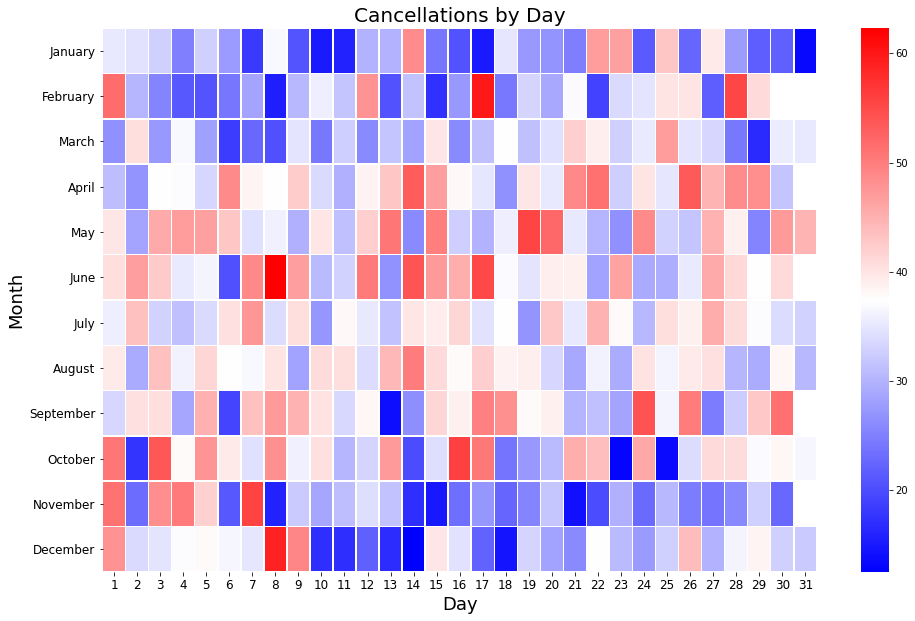

In [ ]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(heatmap_normdf, linewidths=.5, xticklabels=range(1,32), cmap="bwr")
plt.ylabel('Month', fontsize=18)
plt.xlabel('Day',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Cancellations by Day', fontsize=20)

### Lead Time

Lead Time is the time between booking and the actual reservation. Below we look at the summary statistics and a boxplot of each.

In [ ]:
cancel_df['lead_time'].describe()

count    44153.000000
mean       144.925305
std        118.636141
min          0.000000
25%         49.000000
50%        113.000000
75%        215.000000
max        629.000000
Name: lead_time, dtype: float64

In [ ]:
not_cancel_df['lead_time'].describe()

count    74745.000000
mean        80.320209
std         91.188534
min          0.000000
25%          9.000000
50%         46.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64

Text(0.5, 1.0, 'Length of Time Between Booking and Arrival')

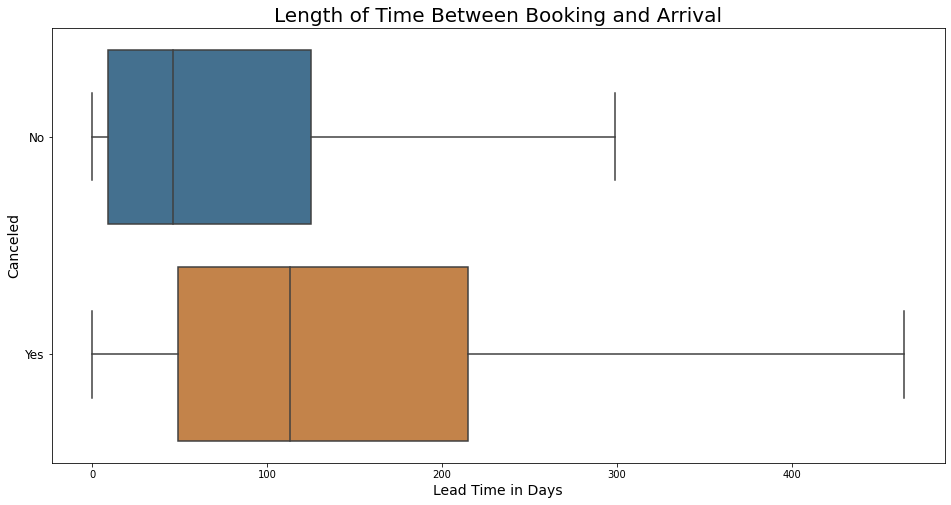

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot( x=df["lead_time"], y=df["is_canceled"],showfliers=False, orient='h', saturation=.5)
plt.xlabel('Lead Time in Days', fontsize=14)
plt.ylabel('Canceled', fontsize=14)
plt.yticks([0,1], ['No', 'Yes'], fontsize=12)
plt.title('Length of Time Between Booking and Arrival', fontsize=20)

## Correlation between cancelation and (columns)

This illustration of a pie plot it get all the data from the column is_canceled and gets the percent of people who canceled and does not canceled. 

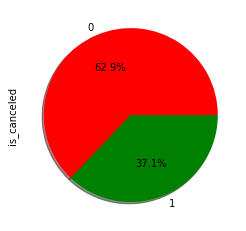

In [ ]:
cols = ['Red', 'Green']
df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)

This graphs represent the percents of cancellation from each column and their unique categories. For instance, the column of hotel have two diferents types of hotels which it show the percent for the type of hotel that have more cancellation or less cancellations. 

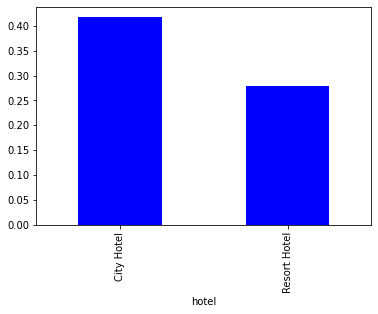

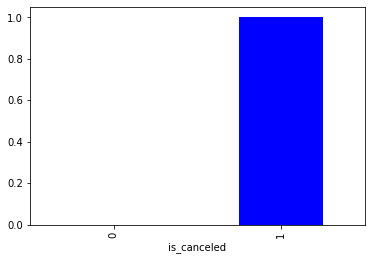

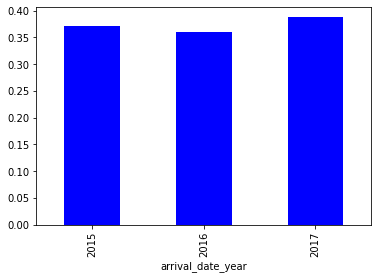

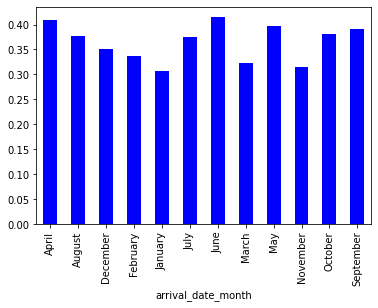

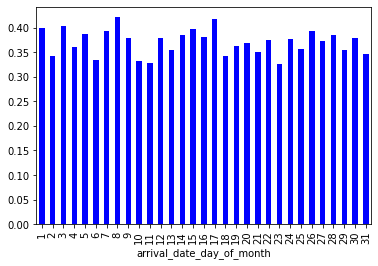

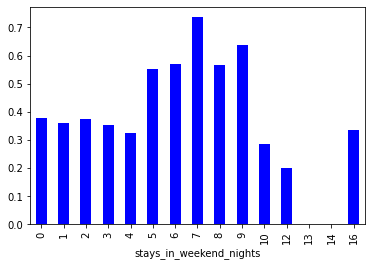

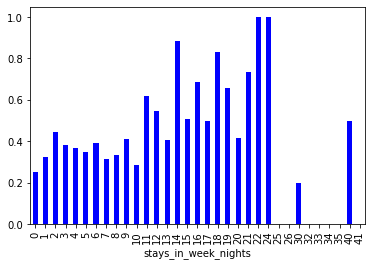

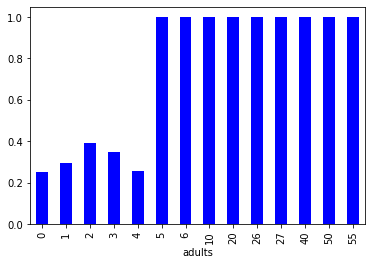

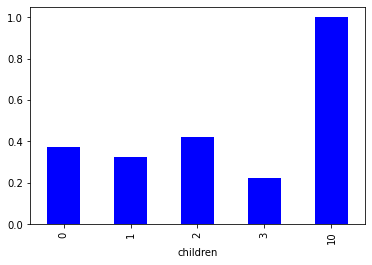

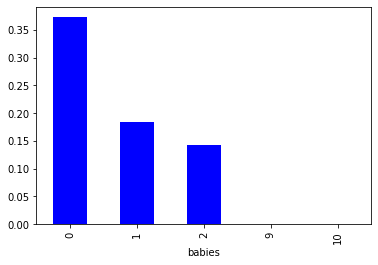

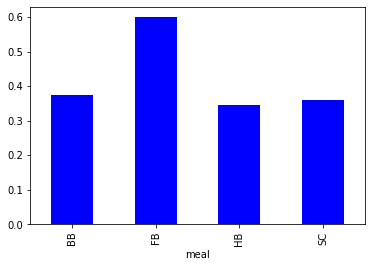

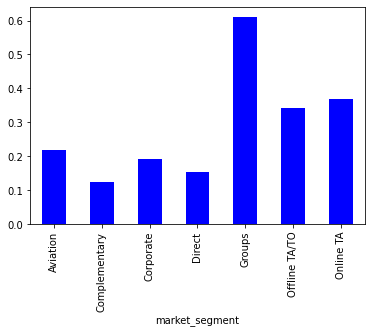

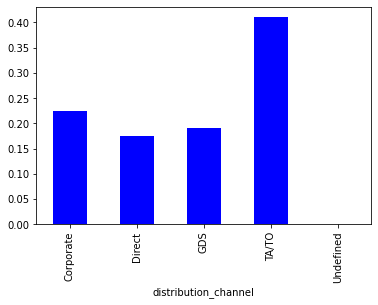

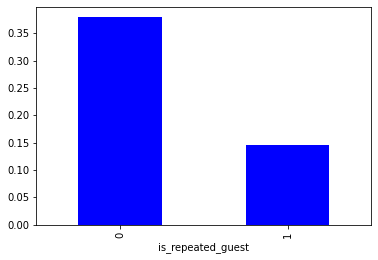

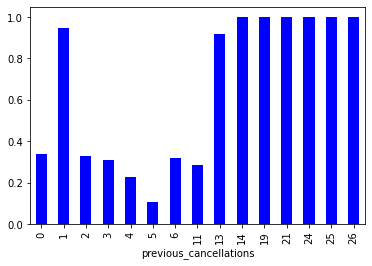

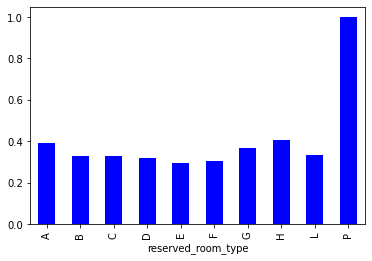

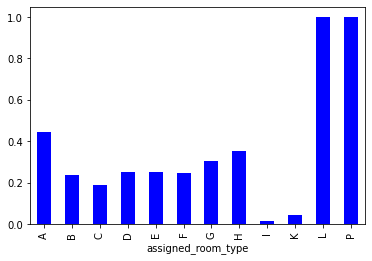

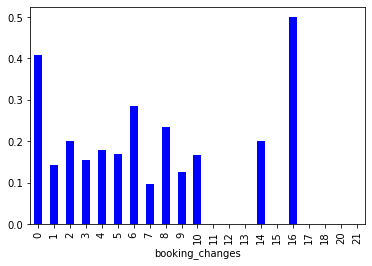

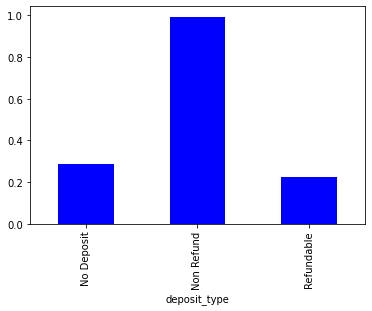

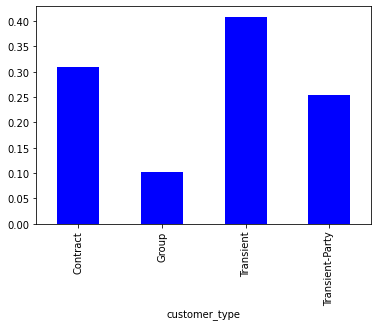

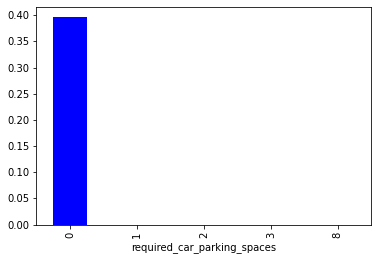

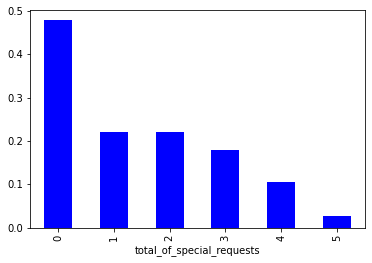

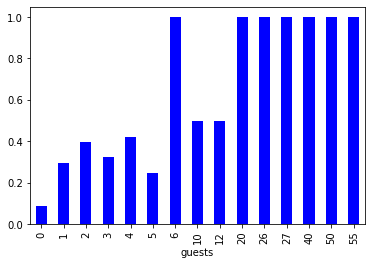

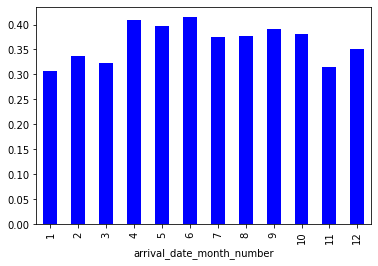

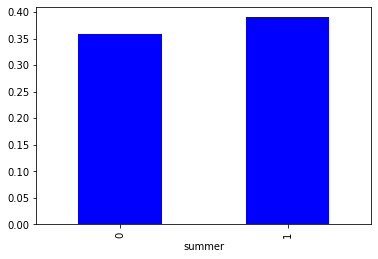

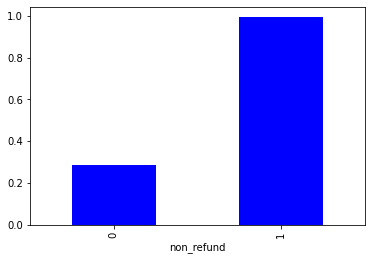

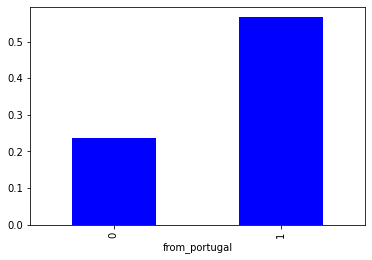

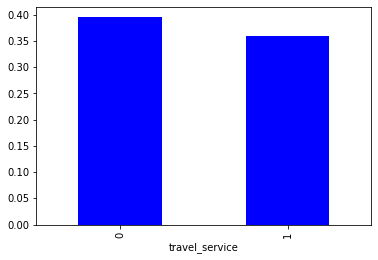

In [ ]:
for i in df.columns:
    if len(df[i].unique())<34:
        m = (df.groupby(i)['is_canceled'].sum())/df.groupby(i)['is_canceled'].count()
        m.plot.bar(color='blue')
        plt.show()

This part of the code represent a graph with the cancellation vs month and we add the categories of hotels.

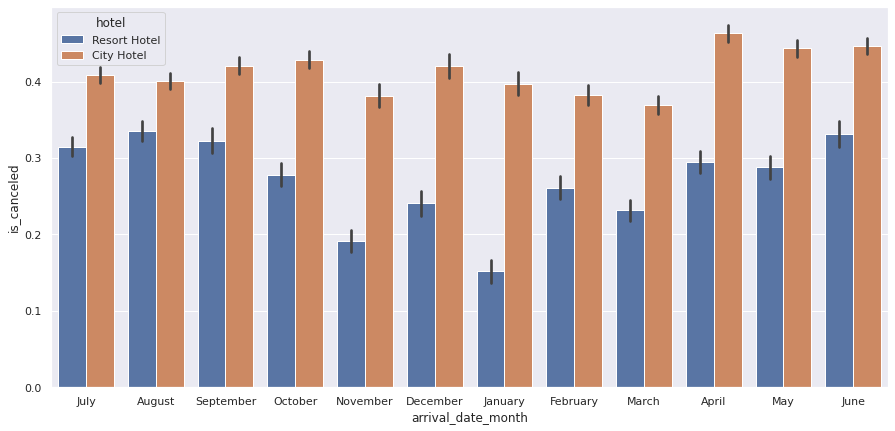

In [ ]:
plt.figure(figsize = (15,7))
sns.set(style="darkgrid")
sns.barplot(x = 'arrival_date_month', y = 'is_canceled',hue='hotel', data = df)

This part of the code represent a graph with the cancellation vs year and we add the categories of hotels.

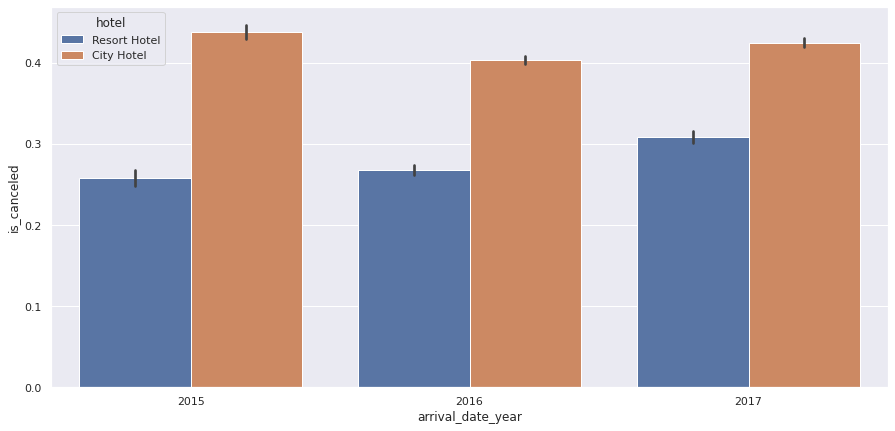

In [ ]:
plt.figure(figsize = (15,7))
sns.set(style="darkgrid")
sns.barplot(x = 'arrival_date_year', y = 'is_canceled',hue='hotel', data = df)

In here we have a map to illustrated from where all the people mostly cancel.

In [ ]:
country_visitors = df[df['is_canceled'] == 1].groupby(['country']).size().reset_index(name = 'count')
import plotly.express as px
px.choropleth(country_visitors,
                    locations = "country",
                    color= "count" ,
                    hover_name= "country", # column to add to hover information
                    color_continuous_scale='blues',#"Blackbody",
                    title="Home country of reserves")

The below graph gives information about the location which bookings made in. According to that, there is an apparent difference in booking location between Portugal and the others. Approx. 40% of all bookings made in the same location: Portugal.

Text(0, 0.5, 'Count')

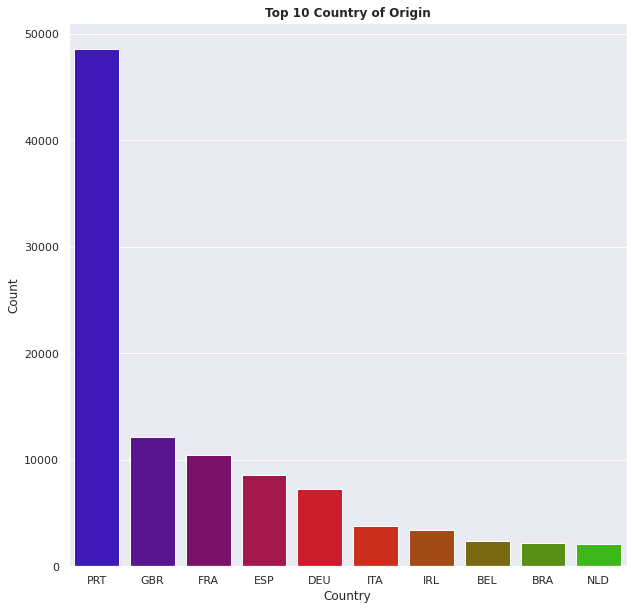

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='country', data=df, 
              order=pd.value_counts(df['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Models

The goal of this section is to try a few different models and ensemble them to find the best results.

## Nearest Neighboors

We will use this dataframe below for all of our models.

In [ ]:
columns = ['is_canceled','lead_time', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled','booking_changes','days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'non_refund',
       'from_portugal', 'travel_service', 'guests', 'arrival_date_month', 'arrival_date_day_of_month', 'total_bookings']
df_new = df[columns]

In [ ]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

Now we must encode it so that we can use all of the columns. Most models don't work on nonnumerical data.

In [ ]:
for c in df_new.columns:
  if c != 'is_canceled':  
    if df_new[c].dtype == object:  #If it is a string, then encode it. 
        try:  
            le = LabelEncoder()           
            le.fit(df_new[c].unique())    
            df_new[c] = le.transform(df_new[c])  
        except Exception as e:         
            print(c)         
            print(e)

Now we can split the data to training and testing data. This will also be used for all the models.

In [ ]:
from sklearn.model_selection import train_test_split
y = df_new.is_canceled
X = df_new.drop(['is_canceled'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Fit the model

In [ ]:
nn_clf = KNeighborsClassifier()
nn_clf.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
nn_clf.predict(test_X)

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [ ]:
nn_clf.predict_proba(test_X)

array([[0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       ...,
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ]])

In [ ]:
y_pred_nn = nn_clf.predict(test_X)
print(classification_report(test_y, y_pred_nn))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82     18751
           1       0.71      0.62      0.66     10974

    accuracy                           0.77     29725
   macro avg       0.75      0.74      0.74     29725
weighted avg       0.76      0.77      0.76     29725



For 0 (did not cancel):
- 79% precision: out of the customers we predicted will not cancel, 79% of them actually did not
- 85% recall: out of the customers who actually did not cancel, 85% of them did we predict would not cancel
- 82% f1-score: the harmonic mean rather than the normal mean of precision and recall for not cancel

For 1 (cancel):
- 71% precision: out of the customer we predicted will cancel, 71% of them actually did
- 62% recall: out of the customers who actually did cancel, 62% of them did we predict would cancel
- 66% f1-score: the harmonic mean rather than the normal mean of precision and recall for cancel

In general, the model preformed better on predicting the customers who actually did not cancel as seen in the higher recall and f1-score.

In [ ]:
# Different number of neighbors used for prediction
for n_neighbors in [1, 5, 10, 15]:
    #  Build the classifier
    nn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train it
    nn_clf.fit(train_X, train_y)
    
    # Make predictions on the test set
    y_pred_nn = nn_clf.predict(test_X)
    
    # Print the classification report
    print(f'{n_neighbors} neighbors')
    print(classification_report(test_y, y_pred_nn))
    print('='*40)

1 neighbors
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     18751
           1       0.69      0.70      0.70     10974

    accuracy                           0.78     29725
   macro avg       0.76      0.76      0.76     29725
weighted avg       0.78      0.78      0.78     29725

5 neighbors
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     18751
           1       0.71      0.62      0.66     10974

    accuracy                           0.77     29725
   macro avg       0.75      0.74      0.74     29725
weighted avg       0.76      0.77      0.76     29725

10 neighbors
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     18751
           1       0.77      0.53      0.63     10974

    accuracy                           0.77     29725
   macro avg       0.77      0.72      0.73     29725
weighted avg       0.77      0.77    

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

preds = knn.predict(test_X)

acc = knn.score(test_X, test_y)
print(f'Test set accuracy: {100*acc:.2f}%')

Test set accuracy: 77.60%


In [ ]:
import joblib                   #Save model
joblib.dump(knn, drive_dir + 'nn_model.joblib')

['/content/drive/My Drive/Project3_HotelBookings/nn_model.joblib']

## XGBoost

Below is a XGBoost model. This is a decision tree based model with boosting that allows us to get better predictions.

In [ ]:
df_encoded = df_new

In [ ]:
from sklearn.model_selection import train_test_split
y = df_encoded.is_canceled
X = df_encoded.drop(['is_canceled'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
train_model = model.fit(train_X, train_y)

As you can see about 81% accuracy.

In [ ]:
from sklearn.metrics import accuracy_score
pred2 = model.predict(test_X)
print("Accuracy for model: %.2f" % (accuracy_score(test_y, pred2) * 100))

Accuracy for model: 80.99


Now we can plot the feature importances.

In [ ]:
featuredf = pd.DataFrame(model.feature_importances_, train_X.columns)   #This makes it in order
featuredf = featuredf.sort_values(by=0, ascending=False)

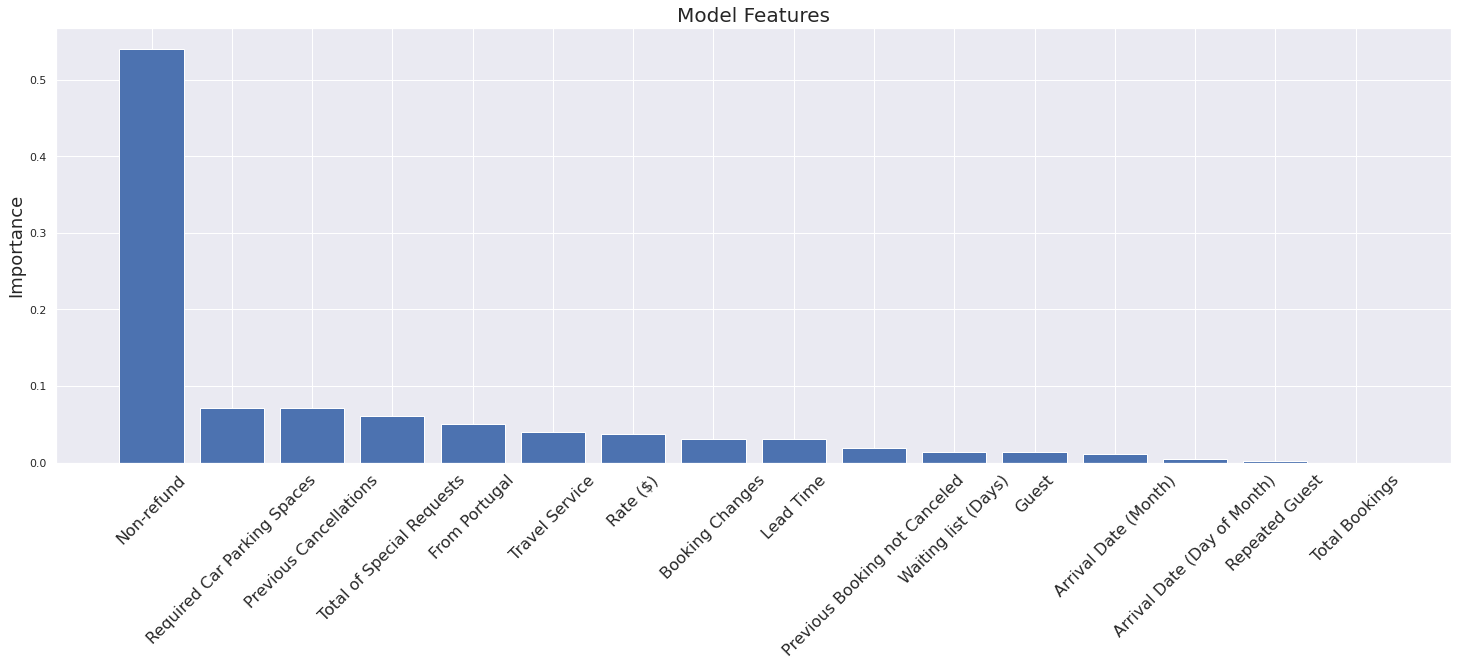

In [ ]:
plt.figure(figsize=(25, 8))

x = featuredf.index
y = featuredf[0]

plt.bar(x, y)
plt.xticks(rotation=45, fontsize=18);
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], ['Non-refund', 'Required Car Parking Spaces','Previous Cancellations', 'Total of Special Requests', 'From Portugal', 'Travel Service', 'Rate ($)','Booking Changes','Lead Time','Previous Booking not Canceled', 'Waiting list (Days)', 'Guest', 'Arrival Date (Month)', 'Arrival Date (Day of Month)','Repeated Guest','Total Bookings'], fontsize =16)

plt.ylabel('Importance', fontsize =18)
plt.title('Model Features', fontsize =20);

In [ ]:
from sklearn.metrics import classification_report


preds = model.predict(test_X)

print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     18751
           1       0.82      0.62      0.71     10974

    accuracy                           0.81     29725
   macro avg       0.81      0.77      0.78     29725
weighted avg       0.81      0.81      0.80     29725



For 0 (did not cancel):

- 81% precision: out of the customers we predicted will not cancel, 81% of them actually did not
- 92% recall: out of the customers who actually did not cancel, 92% of them did we predict would not cancel
- 86% f1-score: the harmonic mean rather than the normal mean of precision and recall for not cancel

For 1 (cancel):

- 82% precision: out of the customer we predicted will cancel, 82% of them actually did
- 62% recall: out of the customers who actually did cancel, 62% of them did we predict would cancel
- 71% f1-score: the harmonic mean rather than the normal mean of precision and recall for cancel

Not bad at all. The precision is very impressive. The recall shows us that our model struggle to predict the is canceled correct sometimes but overall performs well.

In [ ]:
import joblib                 #Save Model
joblib.dump(model, drive_dir + 'xg_model.joblib')

['/content/drive/My Drive/Project3_HotelBookings/xg_model.joblib']

## Logistic Regression

Fit the model for logistic regression we use max_inter to have a better accuracy.

In [ ]:
clf = LogisticRegression(max_iter=10000)

X_scaled = preprocessing.scale(train_X)

scaler = preprocessing.StandardScaler().fit(train_X)
scaler
StandardScaler()

min_max_scaler = preprocessing.MinMaxScaler()
train_X_minmax = min_max_scaler.fit_transform(train_X)
train_X_minmax
clf.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = clf.predict(test_X)

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84     18751
           1       0.81      0.54      0.65     10974

    accuracy                           0.78     29725
   macro avg       0.79      0.73      0.75     29725
weighted avg       0.79      0.78      0.77     29725



For 0 (did not cancel):

- 77% precision: out of the customers we predicted will not cancel, 77% of them actually did not
- 93% recall: out of the customers who actually did not cancel, 93% of them did we predict would not cancel
- 84% f1-score: the harmonic mean rather than the normal mean of precision and recall for not cancel

For 1 (cancel):

- 81% precision: out of the customer we predicted will cancel, 81% of them actually did
- 54% recall: out of the customers who actually did cancel, 54% of them did we predict would cancel
- 65% f1-score: the harmonic mean rather than the normal mean of precision and recall for cancel


In [ ]:
import joblib 
joblib.dump(clf, drive_dir + 'log_model.joblib')

['/content/drive/My Drive/Project3_HotelBookings/log_model.joblib']

## Ensemble

Let's ensemble our models just to see if it performs better.

In [ ]:
nn_preds = knn.predict(test_X)      #Save all the predictions
log_preds = clf.predict(test_X)
XG_preds = model.predict(test_X)

Below we are going to look at each prediction for one row of test data. If 2 or more of the models predicted yes then we go with yes it did cancel, otherwise we predict that it did not cancel.

In [ ]:
predictions = np.zeros(test_X.shape[0])
for pred in range(test_X.shape[0]):
  nn = nn_preds[pred]
  log = log_preds[pred]
  XG = XG_preds[pred]

  if nn+log+XG >= 2:
    predictions[pred] = 1
  else:
    predictions[pred] = 0

In [ ]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     18751
           1       0.86      0.60      0.70     10974

    accuracy                           0.81     29725
   macro avg       0.83      0.77      0.78     29725
weighted avg       0.82      0.81      0.80     29725



We can see this did not perform better than the XGBoost model.